# 185. Department Top Three Salaries    
Table: `Employee`  
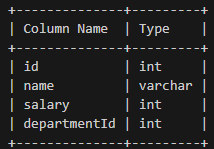    
id is the primary key (column with unique values) for this table.  
departmentId is a foreign key (reference column) of the ID from the Department table.  
Each row of this table indicates the ID, name, and salary of an employee. It also contains the ID of their `department`.  
 

Table: `Department`  
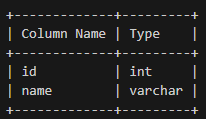  
id is the primary key (column with unique values) for this table.  
Each row of this table indicates the ID of a department and its name.  
   

A company's executives are interested in seeing who earns the most money in each of the company's departments.  
 A **high earner** in a department is an employee who has a salary in the **top three unique** salaries for that department.  

Write a solution to find the employees who are **high earners** in each of the departments.  

Return the result table **in any order.**   

The result format is in the following example.  

 

**Example 1:**  

**Input**:   
Employee table:    
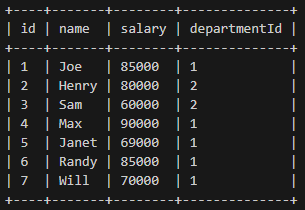  
Department table:  
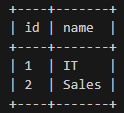  
**Output:**    
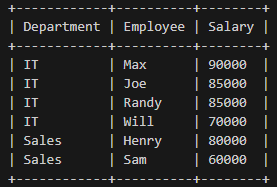  
**Explanation**:   
In the IT department:  
- Max earns the highest unique salary  
- Both Randy and Joe earn the second-highest unique salary  
- Will earns the third-highest unique salary  

In the Sales department:  
- Henry earns the highest salary  
- Sam earns the second-highest salary  
- There is no third-highest salary as there are only two employees  



In [37]:
import pandas as pd


def top_three_salaries(
    employee: pd.DataFrame, department: pd.DataFrame
) -> pd.DataFrame:
    salaries = employee[["salary", "departmentId"]].drop_duplicates()
    top_salaries = (
        salaries.sort_values("salary", ascending=False).groupby("departmentId").head(3)
    )
    top_salaries_department = pd.merge(
        top_salaries, department, how="left", left_on="departmentId", right_on="id"
    ).rename(columns={"name": "Department"})[["departmentId", "salary", "Department"]]
    return pd.merge(
        top_salaries_department, employee, how="left", on=["salary", "departmentId"]
    )[["Department", "name", "salary"]].rename(
        columns={"name": "Employee", "salary": "Salary"}
    )

# Testing  


In [38]:
employee = pd.DataFrame(
    {
        "id": [1, 2, 3, 4, 5],
        "name": ["Kamil", "Aleksa", "Jan Jakob", "Michalina", "Paula"],
        "salary": [12000, 6500, 15000, 2000, 1456],
        "departmentId": [11, 11, 33, 33, 33],
    }
)
department = pd.DataFrame(
    {"id": [11, 33, 44], "name": ["Data Analytics", "Modelling", "Accounting"]}
)

In [39]:
top_three_salaries(employee, department)

,Department,Employee,Salary
0,Modelling,Jan Jakob,15000
1,Data Analytics,Kamil,12000
2,Data Analytics,Aleksa,6500
3,Modelling,Michalina,2000
4,Modelling,Paula,1456


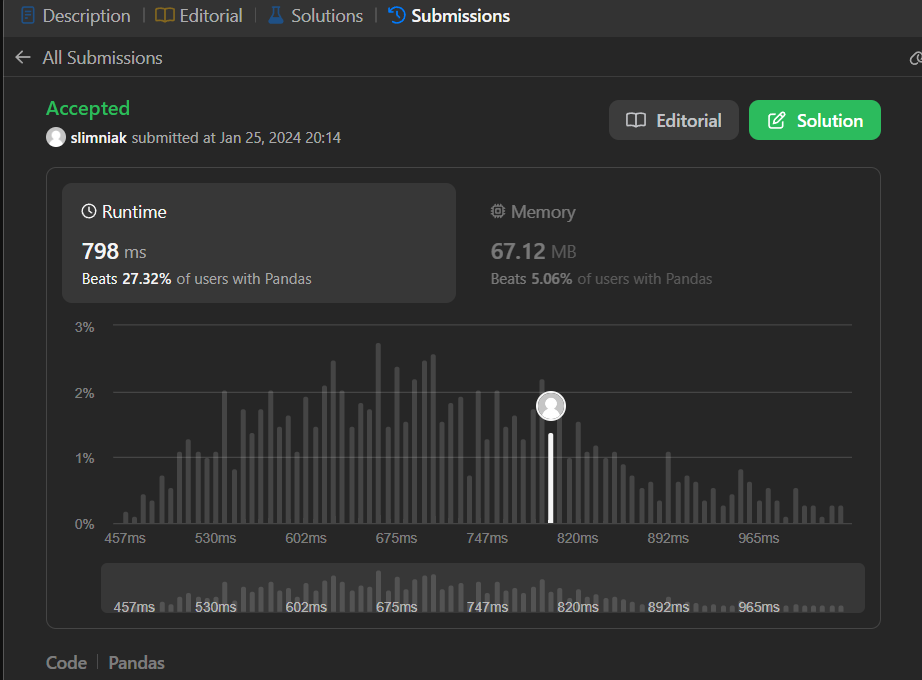